<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Caricamento dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train_flat = x_train.reshape(-1, 3072)
x_test_flat = x_test.reshape(-1, 3072)

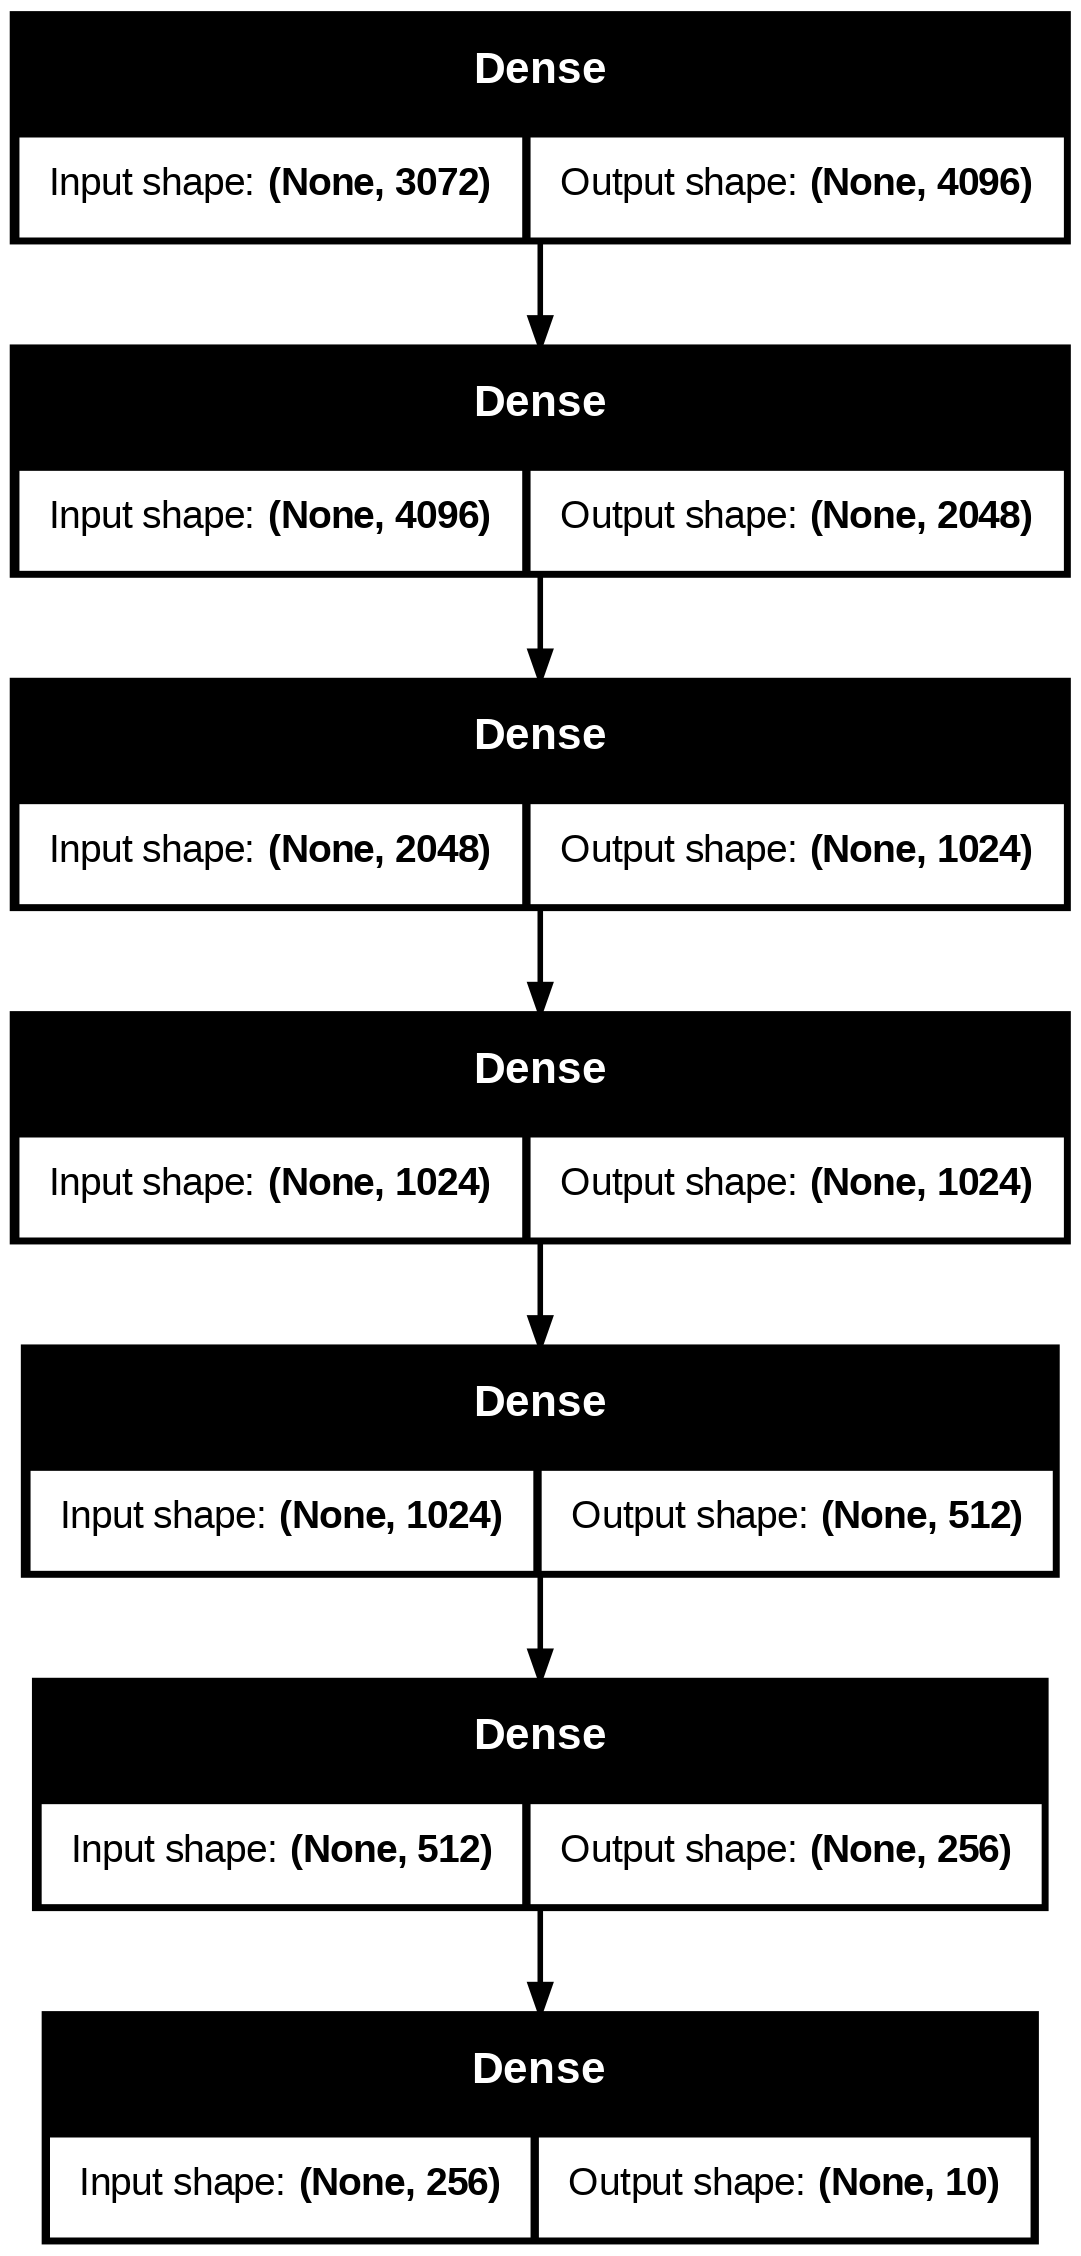

In [4]:
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(4096, activation='relu', name='layer-one'),
    layers.Dense(2048, activation='relu', name='layer-two'),
    layers.Dense(1024, activation='relu', name='layer-three'),
    layers.Dense(1024, activation='relu', name='layer-four'),
    layers.Dense(512, activation='relu', name='layer-five'),
    layers.Dense(256, activation='relu', name='layer-six'),
    layers.Dense(10, activation='softmax', name='layer-seven')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

keras.utils.plot_model(model, show_shapes = True)

In [5]:
history = model.fit(
    x_train_flat, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_flat, y_test),
    verbose=1
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1896 - loss: 2.2649 - val_accuracy: 0.3352 - val_loss: 1.7954
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3475 - loss: 1.7909 - val_accuracy: 0.3944 - val_loss: 1.6959
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3875 - loss: 1.6899 - val_accuracy: 0.4008 - val_loss: 1.6726
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4192 - loss: 1.6074 - val_accuracy: 0.4243 - val_loss: 1.6078
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4501 - loss: 1.5409 - val_accuracy: 0.4514 - val_loss: 1.5395
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4568 - loss: 1.5008 - val_accuracy: 0.4707 - val_loss: 1.4844
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4716 - loss: 1.4671 - val_accuracy: 0.4643 - val_loss: 1.5187
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4939 - loss: 1.4099 - va

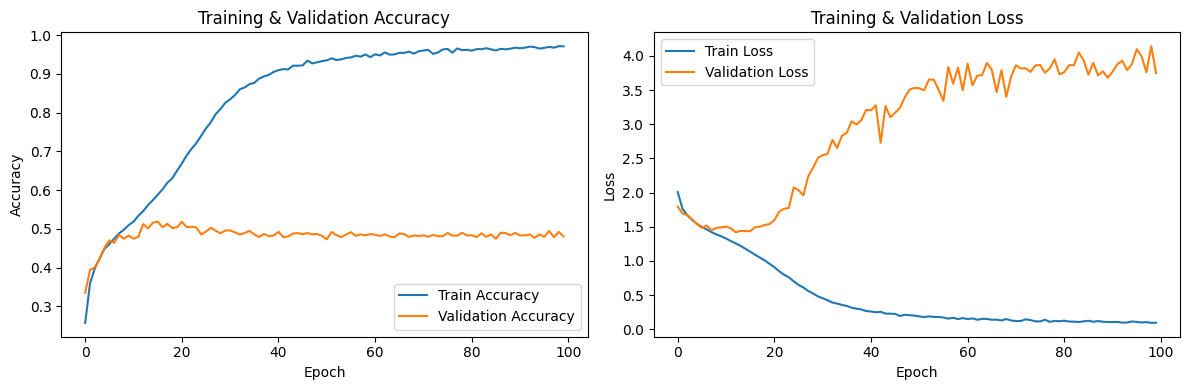

In [6]:
# Plot dei risultati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss')
ax2.legend()

plt.tight_layout()
plt.savefig('problem2_original_results.png')
plt.show()

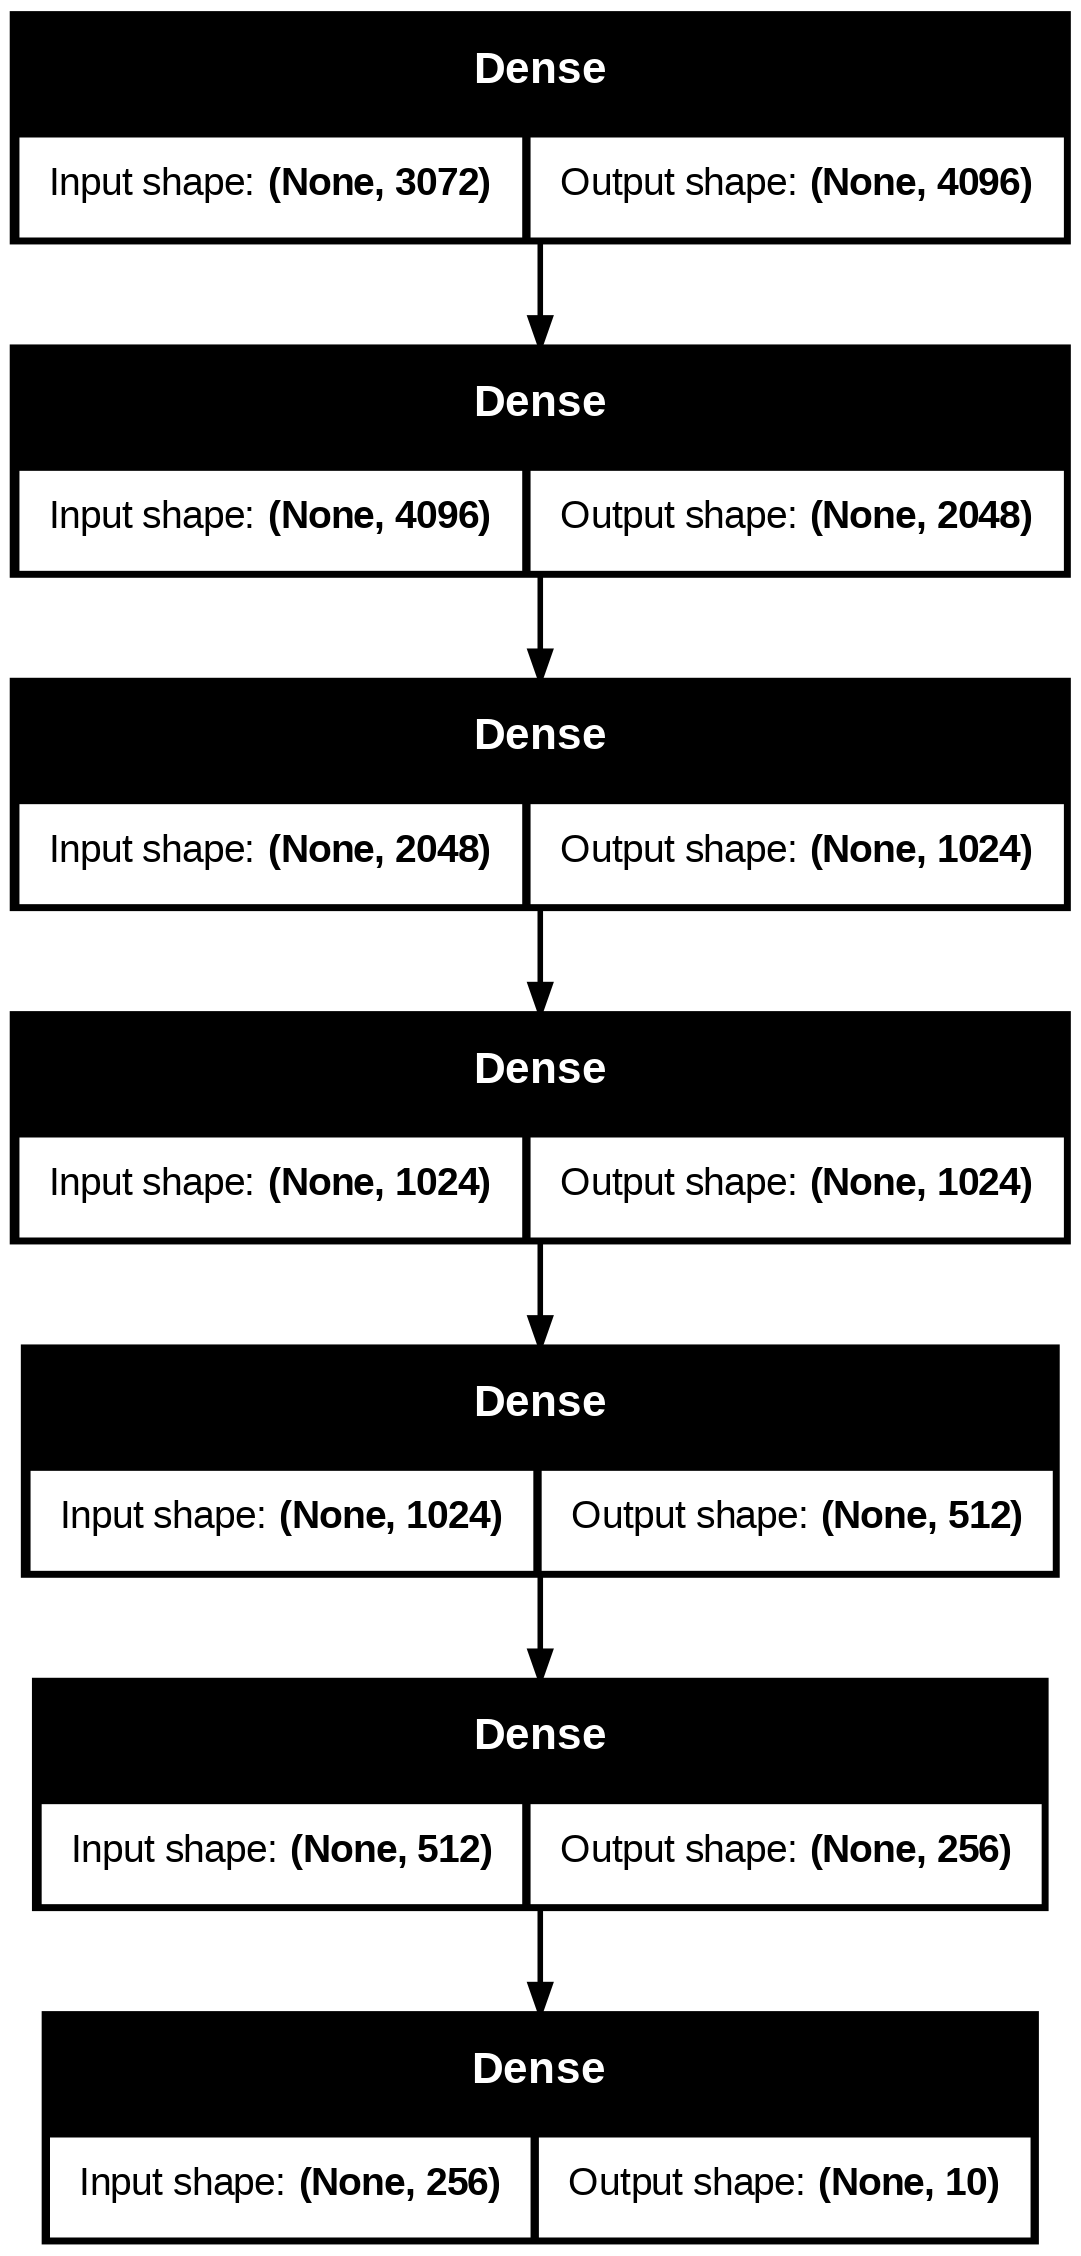

In [24]:
# Modello con L2 Regularization (e Dropout)
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # layers.Dropout(0.4),  # Dropout dopo Dense
    layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # layers.Dropout(0.4),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

keras.utils.plot_model(model, show_shapes = True)

In [25]:
# Callback di Early Stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Training con Early Stopping attivo
history = model.fit(
    x_train_flat, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_flat, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.1498 - loss: 5.3637 - val_accuracy: 0.2403 - val_loss: 2.4925
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2534 - loss: 2.3699 - val_accuracy: 0.3026 - val_loss: 2.1028
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2957 - loss: 2.0755 - val_accuracy: 0.2985 - val_loss: 2.0287
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3196 - loss: 1.9624 - val_accuracy: 0.3329 - val_loss: 1.8813
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3450 - loss: 1.8759 - val_accuracy: 0.3668 - val_loss: 1.8226
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3667 - loss: 1.8317 - val_accuracy: 0.3739 - val_loss: 1.7864
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3826 - loss: 1.7862 - val_accuracy: 0.4104 - val_loss: 1.7401
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3991 - loss: 1.7526 -

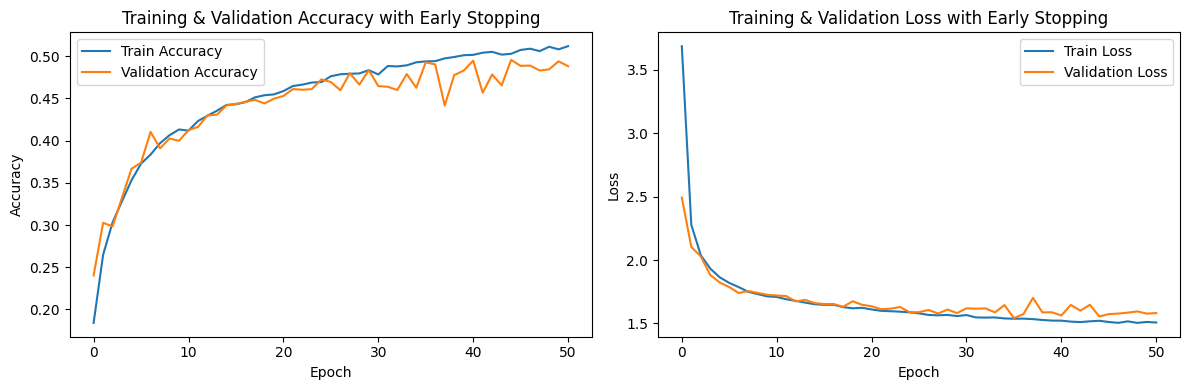

In [26]:
# Plot dei risultati con Early Stopping
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy with Early Stopping')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss with Early Stopping')
ax2.legend()

plt.tight_layout()
plt.savefig('problem2_early_stopping_results.png')
plt.show()